In [1]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

#####
# custom functions
#####
import etl
from function import *

#####
# custom to script
####
from sklearn import linear_model

/Users/cngan/code/spectacle/env/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [2]:
df_set, df_raw_test = etl.etl('competition_data')
print df_set.shape
Y_KEY = 'cost'

(30213, 53)


In [3]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder ()
 
df_set['supplier'] = enc.fit_transform(df_set[['supplier']])
df_set['bracket_pricing'] = enc.fit_transform(df_set[['bracket_pricing']])
df_set[feature_keys].head()

/Users/cngan/code/spectacle/env/lib/python2.7/site-packages/sklearn/preprocessing/label.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cngan/code/spectacle/env/lib/python2.7/site-packages/sklearn/preprocessing/label.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'feature_keys' is not defined

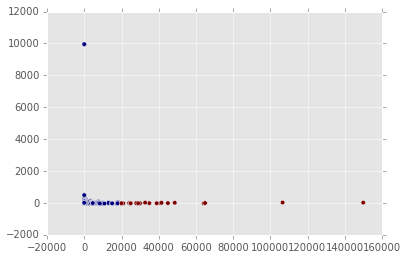

In [12]:
from sklearn import cluster
from sklearn import decomposition
kmean = cluster.KMeans(n_clusters=2)
pca = decomposition.PCA(n_components=2)
X = df_set._get_numeric_data()
X.fillna(0, inplace=True)
kmean.fit(X)
X_trans = pca.fit_transform(X)

## Plot
plt.scatter(X_trans[:,0], X_trans[:,1], c=kmean.labels_)